In [41]:
from pathlib import Path
import torch
from torch.utils.data import ConcatDataset

from deepmash.data_processing.constants import *
from deepmash.data_processing.common import get_dataloaders, ToLogMel, load_stem_audio
from deepmash.data_processing.gtzan_stems import GTZANStemsDataset
from deepmash.data_processing.musdb18 import MUSDB18Dataset
from deepmash.models.cocola_cnn import CocolaCNN
from deepmash.utils.utils import get_device

# reload imported modules automatically (so you dont have to restart kernel when changing .py files)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
ds_gtzan = GTZANStemsDataset(
    root_dir="datasets/gtzan-stems",
    already_preprocessed=True,
    preprocess_transform=ToLogMel(),
)

ds_musdb_train = MUSDB18Dataset(
    root_dir="datasets/musdb18",
    split="train",
    already_preprocessed=True,
    preprocess_transform=ToLogMel(),
)
ds_musdb_test = MUSDB18Dataset(
    root_dir="datasets/musdb18",
    split="test",
    already_preprocessed=True,
    preprocess_transform=ToLogMel(),
)

print(len(ds_gtzan), len(ds_musdb_train), len(ds_musdb_test))
print(ds_gtzan[42].vocals.shape, ds_musdb_train[42].vocals.shape)

2000 1243 841
torch.Size([64, 751]) torch.Size([64, 751])


In [ ]:
# check that dataloaders and forward-pass works

train_loader, val_loader, test_loader = get_dataloaders(
    dataset=ds_gtzan,
    batch_size=16,
    val_split=0.1,
    test_split=0.1
)

device = get_device()
print(f"Using device: {device}")

model = CocolaCNN(learning_rate=0.001, embedding_dim=512, dropout_p=0.1)
model = model.to(device)

batch = next(iter(train_loader))
batch = batch.to(device)
print(batch.vocals.shape, batch.non_vocals.shape)

model(batch).shape

Using device: mps


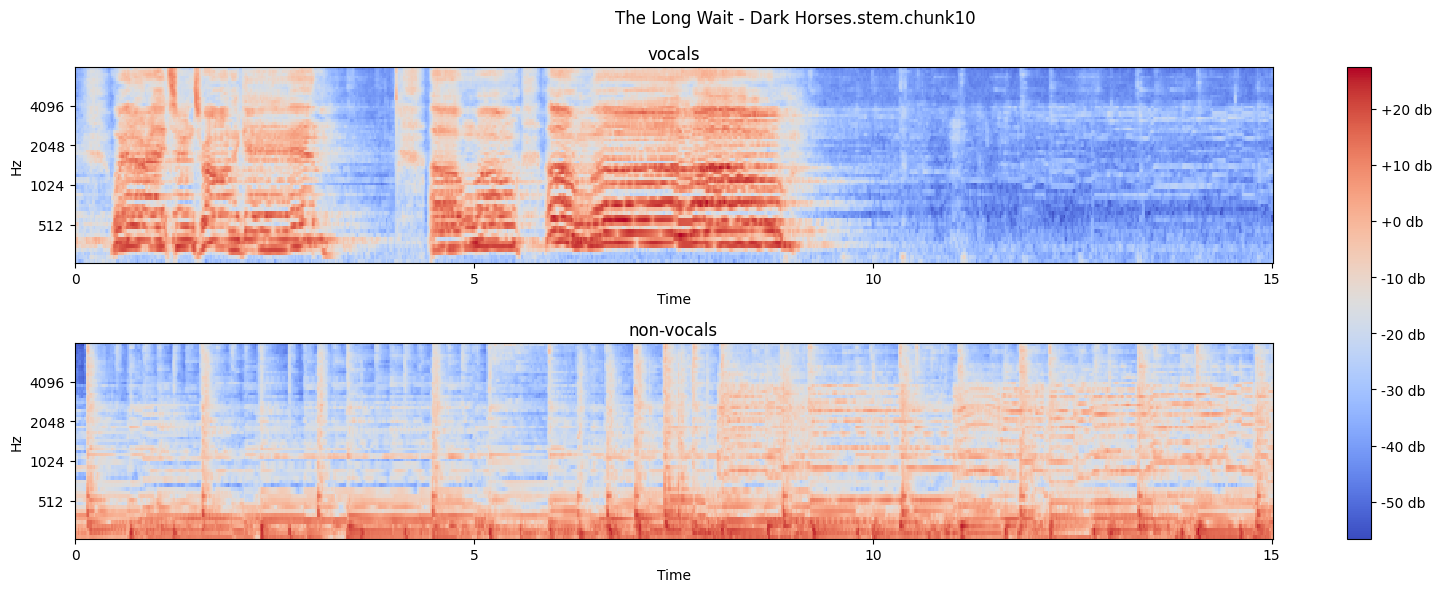

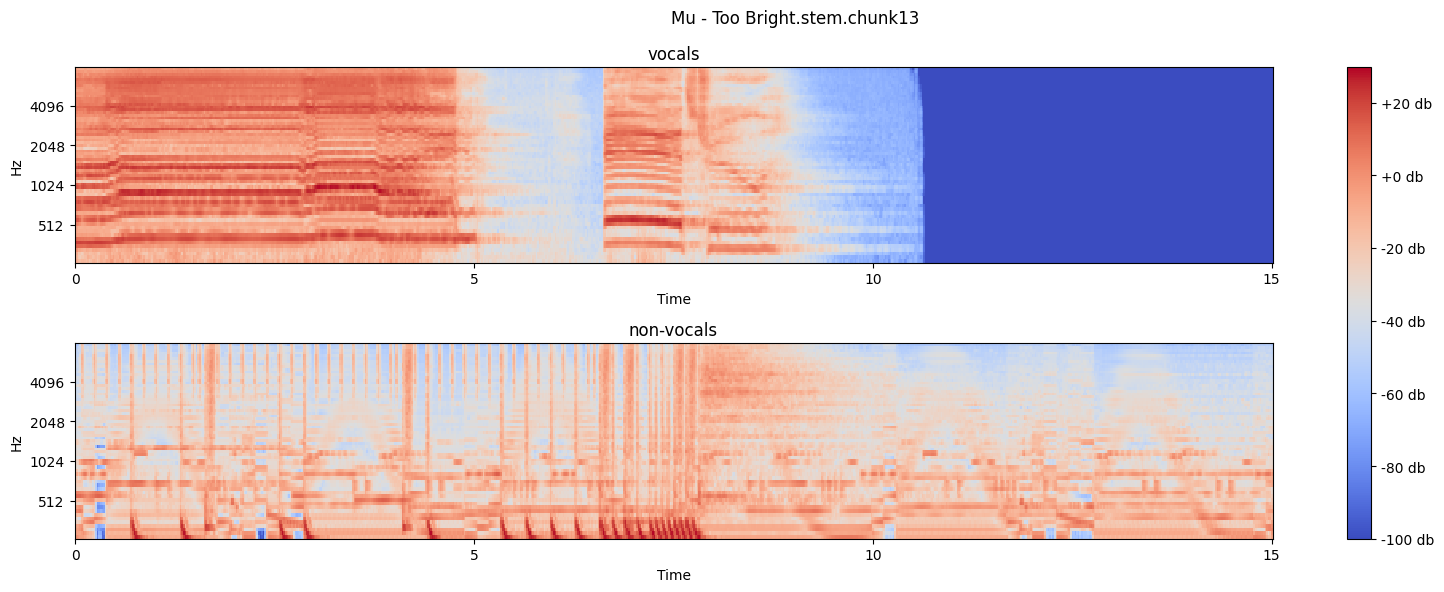

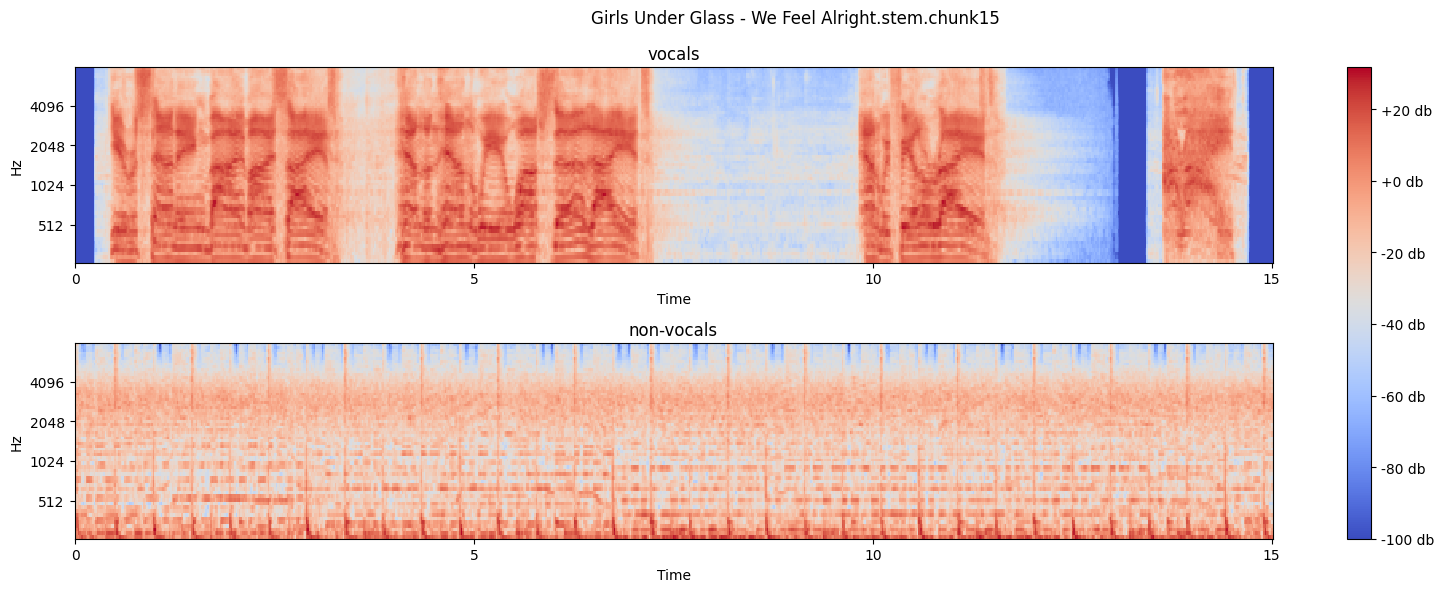

In [57]:
from deepmash.utils.utils import display_random_chunk

for _ in range(3):
    display_random_chunk(ds_musdb_test)